## Testing Watershed Segmentation - Deep Learning

In [1]:
%matplotlib inline

import os

import numpy as np
import tensorflow as tf

from collections import defaultdict
from typing import Dict, List

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img

In [2]:
img_path: str = "../WeedCountImages_v1"
dirs: List[str] = os.listdir(img_path)

In [3]:
dirs

['5', '3', '8', '2', '7', '1', '4', '6', '9+']

In [4]:
images: Dict[int, List[str]] = defaultdict(list)
for di in dirs:
    try:
        dir_num = int(di)
        dir_images = os.listdir(f"{img_path}/{di}")
        images[dir_num] = dir_images
    except ValueError:
        # Skip 9+ because it is not an exact label
        continue

In [5]:
test_file_path: str = f"{img_path}/1/{images[1][0]}"

In [6]:
test_file_path

'../WeedCountImages_v1/1/719.png'

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(75, 75)


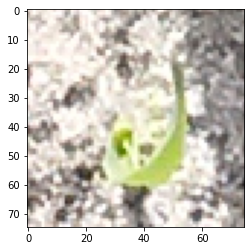

In [7]:
i = load_img(test_file_path)
print(type(i))
print(i.format)
print(i.mode)
print(i.size)
plt.imshow(i)
plt.show()

In [8]:
np.array(i).shape

(75, 75, 3)

In [9]:
# Convert images to numpy arrays

In [52]:
def load_data(data: Dict[int, List[str]]):
    """
    Load in plant images and labels

    keyword argument(s):
    data - Dict[int, List[str]], list of image paths
           with the key being the leaf count
    """
    # load in image
    # convert to np array object and add to array
    res: Dict[str, List[np.ndarray]] = {
        'images': [],
        'labels': [],
    }
    for k in data.keys():
        for plant_image in data[k]:
            file_path: str = f"{img_path}/{k}/{plant_image}"
            file_data = np.array(load_img(file_path), dtype=np.float32)
            file_data /= 255.0
            res['images'].append(file_data)
            res['labels'].append(k)
    return res

def train_test_split_manual(data: Dict[str, List[np.ndarray]]):
    """
    Take in plant images and labels and output train/test split
    """
    train_test_per: float = 0.8
    # todo: need to shuffle images/labels
    images_size_split = round(len(data['images'])*train_test_per)
    labels_size_split = round(len(data['labels'])*train_test_per)
    return data['images'][:images_size_split], data['labels'][:labels_size_split], data['images'][images_size_split:], data['labels'][labels_size_split:]

In [53]:
plant_data = load_data(images)

In [54]:
train_images, train_labels, test_images, test_labels = train_test_split_manual(plant_data)

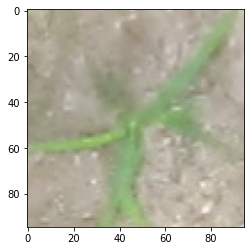

5


In [56]:
plt.imshow(train_images[2])
plt.show()
print(train_labels[2])

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
np.array(train_images).astype('float32')

<ipython-input-39-ec521ac25c48>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(train_images).astype('float32')


ValueError: setting an array element with a sequence.

In [59]:
model.fit(np.array(train_images), np.array(train_labels), epochs=10)

<ipython-input-59-0c9ef17b7063>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  model.fit(np.array(train_images), np.array(train_labels), epochs=10)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [62]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(ftrain_images, ftrain_labels), (ftest_images, ftest_labels) = fashion_mnist.load_data()

In [63]:
ftrain_images.shape

(60000, 28, 28)

In [65]:
ftrain_images[0].shape

(28, 28)

In [68]:
z = np.array(train_images)

<ipython-input-68-4c1c10ff6160>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  z = np.array(train_images)


In [71]:
z.shape

(7042,)

In [76]:
zz = np.concatenate([y[np.newaxis] for y in z])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 119 and the array at index 1 has size 351

In [73]:
zz.shape

(7042, 7042)